In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
def create_dataset(w_star, x_range, sample_size, sigma, seed=None):
    random_state = np.random.RandomState(seed)

    x = random_state.uniform(x_range[0] , x_range[1] , sample_size)


    X = np.zeros((sample_size, w_star.shape[0]))

    for i in range(sample_size):
        X[i, 0] = 1.
        for j in range(1, w_star.shape[0]):
            X[i, j] = x[i] ** j

    y = X @ w_star

    if sigma > 0:
        y += random_state.normal(0.0 , sigma , sample_size )


    return X, y

In [ ]:
w_star =  np.array([-8, -4, 2, 1]).T
x_range = [-3,2]
sample_size = 100
sigma = 0.5

X_train, y_train = create_dataset(w_star, x_range, sample_size, sigma, seed=0)
X_val, y_val = create_dataset(w_star, x_range, sample_size, sigma, seed=1)


# for i in range(sample_size):
#     print(X_train[i], y_train[i])

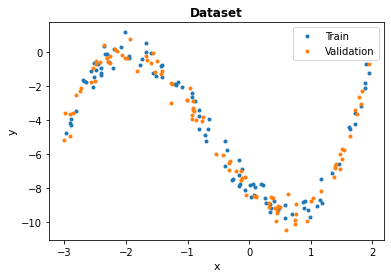

In [ ]:
plt.plot(X_train[:, 1], y_train, '.', label='Train')
plt.plot(X_val[:, 1], y_val, '.', label='Validation')

plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.legend(fontsize=10, fancybox=True)
plt.title('Dataset', weight='bold', fontsize=12)

plt.show()

In [ ]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = nn.Linear(4,1)
model = model.to(DEVICE)


learning_rate = 0.01


loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
X_train = torch.from_numpy(X_train.reshape((sample_size, 4))).float().to(DEVICE)
y_train = torch.from_numpy(y_train.reshape((sample_size, 1))).float().to(DEVICE)
X_val = torch.from_numpy(X_val.reshape((sample_size, 4))).float().to(DEVICE)
y_val = torch.from_numpy(y_val.reshape((sample_size, 1))).float().to(DEVICE)


# X_train = torch.from_numpy(X_train).float().to(DEVICE)
# X_val = torch.from_numpy(X_val).float().to(DEVICE)
# y_train = torch.from_numpy(y_train).float().to(DEVICE)
# y_val = torch.from_numpy(y_val).float().to(DEVICE)




In [ ]:
loss_F = []
val_loss_F = []

num_steps = 1000


for step in range(num_steps):
    model.train() # systematic: put model in ’training’ mode.
    optimizer.zero_grad() # systematic: start step w/ zero gradient.

    y_ = model(X_train) # do prediction using the current model.

    loss = loss_fn(y_, y_train) # compute error.

    loss.backward() # compute gradients.
    optimizer.step() # update parameters

    model.eval() # systematic: put model in ’eval’ mode.
    with torch.no_grad():
        y_ = model(X_val)
        val_loss = loss_fn(y_, y_val)

    loss_F.append(loss.item())
    val_loss_F.append(val_loss.item())


    if step % 100 == 0:
        print(f"Step {step}: train loss: {loss}") # running train loss
        print(f"Step {step}: val loss: {val_loss}")


Step 0: train loss: 47.76329040527344
Step 0: val loss: 43.12419509887695
Step 100: train loss: 4.491819858551025
Step 100: val loss: 4.361963272094727
Step 200: train loss: 1.3244646787643433
Step 200: val loss: 1.2639806270599365
Step 300: train loss: 0.5399802327156067
Step 300: val loss: 0.48219579458236694
Step 400: train loss: 0.3256007730960846
Step 400: val loss: 0.27762308716773987
Step 500: train loss: 0.2659203112125397
Step 500: val loss: 0.22705775499343872
Step 600: train loss: 0.24925170838832855
Step 600: val loss: 0.21642573177814484
Step 700: train loss: 0.2445935606956482
Step 700: val loss: 0.21530146896839142
Step 800: train loss: 0.2432916909456253
Step 800: val loss: 0.21596099436283112
Step 900: train loss: 0.24292775988578796
Step 900: val loss: 0.21665938198566437


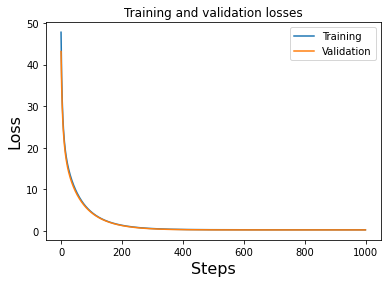

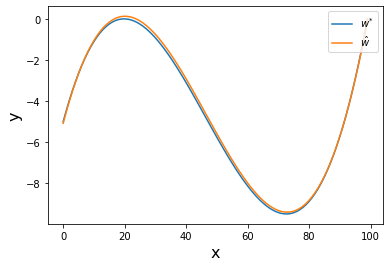

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(loss_F)
ax1.plot(val_loss_F)
ax1.legend(["Training", "Validation"])
ax1.set_title("Training and validation losses")
ax1.set_xlabel("Steps", fontsize=16)
ax1.set_ylabel("Loss", fontsize=16)


x = np.linspace(x_range[0], x_range[1], sample_size)
X = np.zeros((len(x), w_star.shape[0]))

for i in range(len(x)):
  X[i, 0] = 1
  for j in range(1, w_star.shape[0]):
    X[i, j] = x[i]**j  #xi, xi**2, xi**3

  y = X.dot(w_star)
  y_est = model(torch.from_numpy(X).float().to(DEVICE)).detach().reshape(-1)



# Plot w* and w^
fig, ax2 = plt.subplots()
ax2.plot(y)
ax2.plot(y_est.cpu())
ax2.legend(["$w^{*}$", "$\hat{w}$"], loc='upper right')
ax2.set_xlabel("x", fontsize=16)
ax2.set_ylabel("y", fontsize=16)

plt.show()


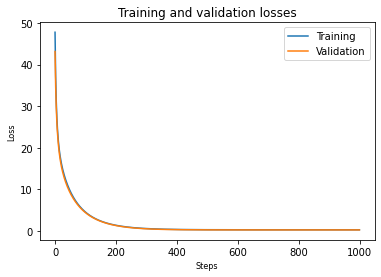

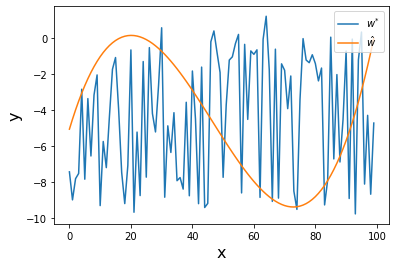

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(loss_F)
ax1.plot(val_loss_F)
ax1.legend(["Training", "Validation"])
ax1.set_title("Training and validation losses")
ax1.set_xlabel("Steps", fontsize=8)
ax1.set_ylabel("Loss", fontsize=8)


# y_est = model(X_train).detach().reshape(-1)
# y_est = y_est.cpu()


x = np.linspace(x_range[0], x_range[1], sample_size)
X = np.zeros((len(x), w_star.shape[0]))

for i in range(len(x)):
  X[i, 0] = 1
  for j in range(1, w_star.shape[0]):
    X[i, j] = x[i]**j  #xi, xi**2, xi**3

  y = X.dot(w_star)
  y_est = model(torch.from_numpy(X).float().to(DEVICE)).detach().reshape(-1)


# Plot w* and w^
fig, ax2 = plt.subplots()
ax2.plot(y_train.cpu())
ax2.plot(y_est.cpu())
ax2.legend(["$w^{*}$", "$\hat{w}$"], loc='upper right')
ax2.set_xlabel("x", fontsize=16)
ax2.set_ylabel("y", fontsize=16)

plt.show()